In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

import pickle

# Problem Statement

# Data Gathering

In [5]:
df=pd.read_csv("dataset.csv")
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


# Exploratory Data Analysis

In [6]:
df.shape

(91713, 85)

In [7]:
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [9]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


In [10]:
(df.isna().mean()*100).to_dict()

{'encounter_id': 0.0,
 'patient_id': 0.0,
 'hospital_id': 0.0,
 'age': 4.610033473989511,
 'bmi': 3.738837460338229,
 'elective_surgery': 0.0,
 'ethnicity': 1.5210493605050537,
 'gender': 0.027258949112993792,
 'height': 1.454537524669349,
 'icu_admit_source': 0.12212009202621221,
 'icu_id': 0.0,
 'icu_stay_type': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 2.965773663493725,
 'apache_2_diagnosis': 1.8121749370318276,
 'apache_3j_diagnosis': 1.2004841189362467,
 'apache_post_operative': 0.0,
 'arf_apache': 0.7796059446316226,
 'gcs_eyes_apache': 2.072770490552048,
 'gcs_motor_apache': 2.072770490552048,
 'gcs_unable_apache': 1.1307012092069826,
 'gcs_verbal_apache': 2.072770490552048,
 'heart_rate_apache': 0.957334292848342,
 'intubated_apache': 0.7796059446316226,
 'map_apache': 1.0838158167326335,
 'resprate_apache': 1.3455017282173738,
 'temp_apache': 4.47919051824714,
 'ventilated_apache': 0.7796059446316226,
 'd1_diasbp_max': 0.17990906414575905,
 'd1_diasbp_min': 

In [11]:
df.isna().mean()*100

encounter_id                     0.000000
patient_id                       0.000000
hospital_id                      0.000000
age                              4.610033
bmi                              3.738837
                                  ...    
solid_tumor_with_metastasis      0.779606
apache_3j_bodysystem             1.812175
apache_2_bodysystem              1.812175
Unnamed: 83                    100.000000
hospital_death                   0.000000
Length: 85, dtype: float64

In [12]:
df['age'].mean()

62.309515917014345

In [13]:
df['age'].median()

65.0

In [14]:
df['age']=df['age'].fillna(df['age'].mean())

In [15]:
df['bmi'].mean()

29.18581766857506

In [16]:
df['bmi'].median()

27.65465458

In [17]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [18]:
df['ethnicity'].mode()

0    Caucasian
Name: ethnicity, dtype: object

In [19]:
df['ethnicity']=df['ethnicity'].fillna(df['ethnicity'].mode()[0])

In [20]:
df['ethnicity'].value_counts().to_dict()

{'Caucasian': 72079,
 'African American': 9547,
 'Other/Unknown': 4374,
 'Hispanic': 3796,
 'Asian': 1129,
 'Native American': 788}

In [21]:
df['ethnicity']=df['ethnicity'].replace(
{'Caucasian': 0,
 'African American': 1,
 'Other/Unknown': 2,
 'Hispanic': 3,
 'Asian': 4,
 'Native American': 5})

In [22]:
df['ethnicity']

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: ethnicity, Length: 91713, dtype: int64

In [23]:
df['gender'].mode()

0    M
Name: gender, dtype: object

In [24]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [25]:
df['gender'].value_counts().to_dict()

{'M': 49494, 'F': 42219}

In [26]:
df['gender'].replace({'M': 0, 'F': 1},inplace=True)

In [27]:
df['height'].median()

170.1

In [28]:
df['height']=df['height'].fillna(df['height'].median())

In [29]:
df['icu_admit_source'].mode()[0]

'Accident & Emergency'

In [30]:
df['icu_admit_source']=df['icu_admit_source'].fillna(df['icu_admit_source'].mode()[0])

In [31]:
df['icu_admit_source'].value_counts().to_dict()

{'Accident & Emergency': 54172,
 'Operating Room / Recovery': 18713,
 'Floor': 15611,
 'Other Hospital': 2358,
 'Other ICU': 859}

In [32]:
df['icu_admit_source'].replace({'Accident & Emergency': 0,
 'Operating Room / Recovery': 1,
 'Floor': 2,
 'Other Hospital': 3,
 'Other ICU': 4},inplace=True)

In [33]:
df['weight'].median()

80.3

In [34]:
df['weight']=df['weight'].fillna(df['weight'].median())

In [35]:
df['apache_2_diagnosis'].median()

122.0

In [36]:
df['apache_2_diagnosis']=df['apache_2_diagnosis'].fillna(df['apache_2_diagnosis'].median())

In [37]:
def fill_nan(feature_name):
    print(df[feature_name].median())
    df[feature_name]=df[feature_name].fillna(df[feature_name].median())
    return df[feature_name].isna().mean()*100
    

In [38]:
fill_nan(['apache_3j_diagnosis'])

apache_3j_diagnosis    409.02
dtype: float64


apache_3j_diagnosis    0.0
dtype: float64

In [39]:
fill_nan(['apache_3j_diagnosis'])

apache_3j_diagnosis    409.02
dtype: float64


apache_3j_diagnosis    0.0
dtype: float64

In [40]:
fill_nan(['arf_apache'])

arf_apache    0.0
dtype: float64


arf_apache    0.0
dtype: float64

In [41]:
(df.isna().mean()*100).to_dict()

{'encounter_id': 0.0,
 'patient_id': 0.0,
 'hospital_id': 0.0,
 'age': 0.0,
 'bmi': 0.0,
 'elective_surgery': 0.0,
 'ethnicity': 0.0,
 'gender': 0.0,
 'height': 0.0,
 'icu_admit_source': 0.0,
 'icu_id': 0.0,
 'icu_stay_type': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 0.0,
 'apache_2_diagnosis': 0.0,
 'apache_3j_diagnosis': 0.0,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'gcs_eyes_apache': 2.072770490552048,
 'gcs_motor_apache': 2.072770490552048,
 'gcs_unable_apache': 1.1307012092069826,
 'gcs_verbal_apache': 2.072770490552048,
 'heart_rate_apache': 0.957334292848342,
 'intubated_apache': 0.7796059446316226,
 'map_apache': 1.0838158167326335,
 'resprate_apache': 1.3455017282173738,
 'temp_apache': 4.47919051824714,
 'ventilated_apache': 0.7796059446316226,
 'd1_diasbp_max': 0.17990906414575905,
 'd1_diasbp_min': 0.17990906414575905,
 'd1_diasbp_noninvasive_max': 1.1339722831005419,
 'd1_diasbp_noninvasive_min': 1.1339722831005419,
 'd1_heartrate_max': 0.15810

In [42]:
fill_nan(['gcs_eyes_apache'])

gcs_eyes_apache    4.0
dtype: float64


gcs_eyes_apache    0.0
dtype: float64

In [43]:
fill_nan(['gcs_motor_apache'])

gcs_motor_apache    6.0
dtype: float64


gcs_motor_apache    0.0
dtype: float64

In [44]:
fill_nan(['gcs_unable_apache'])

gcs_unable_apache    0.0
dtype: float64


gcs_unable_apache    0.0
dtype: float64

In [45]:
fill_nan(['gcs_verbal_apache'])

gcs_verbal_apache    5.0
dtype: float64


gcs_verbal_apache    0.0
dtype: float64

In [46]:
fill_nan(['heart_rate_apache'])

heart_rate_apache    104.0
dtype: float64


heart_rate_apache    0.0
dtype: float64

In [47]:
fill_nan(['intubated_apache'])

intubated_apache    0.0
dtype: float64


intubated_apache    0.0
dtype: float64

In [48]:
fill_nan(['map_apache'])

map_apache    67.0
dtype: float64


map_apache    0.0
dtype: float64

In [49]:
fill_nan(['resprate_apache'])

resprate_apache    28.0
dtype: float64


resprate_apache    0.0
dtype: float64

In [50]:
fill_nan(['temp_apache'])

temp_apache    36.5
dtype: float64


temp_apache    0.0
dtype: float64

In [51]:
fill_nan(['ventilated_apache'])

ventilated_apache    0.0
dtype: float64


ventilated_apache    0.0
dtype: float64

In [52]:
fill_nan(['d1_diasbp_max'])

d1_diasbp_max    86.0
dtype: float64


d1_diasbp_max    0.0
dtype: float64

In [53]:
fill_nan(['d1_diasbp_min'])

d1_diasbp_min    50.0
dtype: float64


d1_diasbp_min    0.0
dtype: float64

In [54]:
fill_nan(['d1_diasbp_noninvasive_max'])

d1_diasbp_noninvasive_max    87.0
dtype: float64


d1_diasbp_noninvasive_max    0.0
dtype: float64

In [55]:
fill_nan(['d1_diasbp_noninvasive_min'])

d1_diasbp_noninvasive_min    50.0
dtype: float64


d1_diasbp_noninvasive_min    0.0
dtype: float64

In [56]:
fill_nan(['d1_resprate_max'])

d1_resprate_max    26.0
dtype: float64


d1_resprate_max    0.0
dtype: float64

In [57]:
fill_nan(['d1_resprate_min'])

d1_resprate_min    13.0
dtype: float64


d1_resprate_min    0.0
dtype: float64

In [58]:
fill_nan(['d1_spo2_max'])

d1_spo2_max    100.0
dtype: float64


d1_spo2_max    0.0
dtype: float64

In [59]:
fill_nan(['d1_spo2_min'])

d1_spo2_min    92.0
dtype: float64


d1_spo2_min    0.0
dtype: float64

In [60]:
fill_nan(['d1_sysbp_max'])

d1_sysbp_max    146.0
dtype: float64


d1_sysbp_max    0.0
dtype: float64

In [61]:
fill_nan(['d1_sysbp_min'])

d1_sysbp_min    96.0
dtype: float64


d1_sysbp_min    0.0
dtype: float64

In [62]:
fill_nan(['h1_sysbp_noninvasive_max'])

h1_sysbp_noninvasive_max    130.0
dtype: float64


h1_sysbp_noninvasive_max    0.0
dtype: float64

In [63]:
fill_nan(['h1_sysbp_noninvasive_min'])

h1_sysbp_noninvasive_min    115.0
dtype: float64


h1_sysbp_noninvasive_min    0.0
dtype: float64

In [64]:
fill_nan(['d1_glucose_max'])

d1_glucose_max    150.0
dtype: float64


d1_glucose_max    0.0
dtype: float64

In [65]:
fill_nan(['d1_glucose_min'])

d1_glucose_min    107.0
dtype: float64


d1_glucose_min    0.0
dtype: float64

In [66]:
fill_nan(['d1_potassium_max'])

d1_potassium_max    4.2
dtype: float64


d1_potassium_max    0.0
dtype: float64

In [67]:
fill_nan(['d1_potassium_min'])

d1_potassium_min    3.9
dtype: float64


d1_potassium_min    0.0
dtype: float64

In [68]:
fill_nan(['apache_4a_hospital_death_prob'])

apache_4a_hospital_death_prob    0.05
dtype: float64


apache_4a_hospital_death_prob    0.0
dtype: float64

In [69]:
fill_nan(['apache_4a_icu_death_prob'])

apache_4a_icu_death_prob    0.02
dtype: float64


apache_4a_icu_death_prob    0.0
dtype: float64

In [70]:
fill_nan(['aids'])

aids    0.0
dtype: float64


aids    0.0
dtype: float64

In [71]:
fill_nan(['cirrhosis'])

cirrhosis    0.0
dtype: float64


cirrhosis    0.0
dtype: float64

In [72]:
fill_nan(['diabetes_mellitus'])

diabetes_mellitus    0.0
dtype: float64


diabetes_mellitus    0.0
dtype: float64

In [73]:
fill_nan(['hepatic_failure'])

hepatic_failure    0.0
dtype: float64


hepatic_failure    0.0
dtype: float64

In [74]:
fill_nan(['immunosuppression'])

immunosuppression    0.0
dtype: float64


immunosuppression    0.0
dtype: float64

In [75]:
fill_nan(['leukemia'])

leukemia    0.0
dtype: float64


leukemia    0.0
dtype: float64

In [76]:
fill_nan(['lymphoma'])

lymphoma    0.0
dtype: float64


lymphoma    0.0
dtype: float64

In [77]:
fill_nan(['solid_tumor_with_metastasis'])

solid_tumor_with_metastasis    0.0
dtype: float64


solid_tumor_with_metastasis    0.0
dtype: float64

In [78]:
fill_nan(['apache_3j_bodysystem'])

Series([], dtype: float64)


C:\Users\soura\AppData\Local\Temp\ipykernel_10824\2603381081.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[feature_name].median())
C:\Users\soura\AppData\Local\Temp\ipykernel_10824\2603381081.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[feature_name]=df[feature_name].fillna(df[feature_name].median())


apache_3j_bodysystem    1.812175
dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [80]:
df['d1_heartrate_max']=df['d1_heartrate_max'].fillna(df['d1_heartrate_max'].median())

In [81]:
df['d1_heartrate_min']=df['d1_heartrate_min'].fillna(df['d1_heartrate_min'].median())

In [82]:
df['d1_mbp_max']=df['d1_mbp_max'].fillna(df['d1_mbp_max'].median())

In [83]:
df['d1_mbp_min']=df['d1_mbp_min'].fillna(df['d1_mbp_min'].median())

In [84]:
df['d1_mbp_noninvasive_max']=df['d1_mbp_noninvasive_max'].fillna(df['d1_mbp_noninvasive_max'].median())

In [85]:
df['d1_mbp_noninvasive_min']=df['d1_mbp_noninvasive_min'].fillna(df['d1_mbp_noninvasive_min'].median())

In [86]:
df['d1_temp_max']=df['d1_temp_max'].fillna(df['d1_temp_max'].median())

In [87]:
df['d1_temp_min']=df['d1_temp_min'].fillna(df['d1_temp_min'].median())

In [88]:
df['h1_diasbp_max']=df['h1_diasbp_max'].fillna(df['h1_diasbp_max'].median())

In [89]:
df['h1_diasbp_min']=df['h1_diasbp_min'].fillna(df['h1_diasbp_min'].median())

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [91]:
df['h1_diasbp_noninvasive_max']=df['h1_diasbp_noninvasive_max'].fillna(df['h1_diasbp_noninvasive_max'].median())

In [92]:
df['h1_diasbp_noninvasive_min']=df['h1_diasbp_noninvasive_min'].fillna(df['h1_diasbp_noninvasive_min'].median())

In [93]:
df['h1_heartrate_max']=df['h1_heartrate_max'].fillna(df['h1_heartrate_max'].median())

In [94]:
df['h1_heartrate_min']=df['h1_heartrate_min'].fillna(df['h1_heartrate_min'].median())

In [95]:
df['h1_mbp_max']=df['h1_mbp_max'].fillna(df['h1_mbp_max'].median())

In [96]:
df['h1_mbp_min']=df['h1_mbp_min'].fillna(df['h1_mbp_min'].median())

In [97]:
df['h1_mbp_noninvasive_max']=df['h1_mbp_noninvasive_max'].fillna(df['h1_mbp_noninvasive_max'].median())

In [98]:
df['h1_mbp_noninvasive_min']=df['h1_mbp_noninvasive_min'].fillna(df['h1_mbp_noninvasive_min'].median())

In [99]:
df['h1_resprate_max']=df['h1_resprate_max'].fillna(df['h1_resprate_max'].median())

In [100]:
df['h1_resprate_min']=df['h1_resprate_min'].fillna(df['h1_resprate_min'].median())

In [101]:
df['h1_spo2_max']=df['h1_spo2_max'].fillna(df['h1_spo2_max'].median())

In [102]:
df['h1_spo2_min']=df['h1_spo2_min'].fillna(df['h1_spo2_min'].median())

In [103]:
df['h1_sysbp_max']=df['h1_sysbp_max'].fillna(df['h1_sysbp_max'].median())

In [104]:
df['h1_sysbp_min']=df['h1_sysbp_min'].fillna(df['h1_sysbp_min'].median())

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [106]:
df["d1_sysbp_noninvasive_max"]=df["d1_sysbp_noninvasive_max"].fillna(df["d1_sysbp_noninvasive_max"].median())

In [107]:
df["d1_sysbp_noninvasive_min"]=df["d1_sysbp_noninvasive_min"].fillna(df["d1_sysbp_noninvasive_min"].median())

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [109]:
df['apache_3j_bodysystem'].mode()[0]

'Cardiovascular'

In [110]:
df['apache_3j_bodysystem']=df['apache_3j_bodysystem'].fillna(df['apache_3j_bodysystem'].mode()[0])

In [111]:
df['apache_3j_bodysystem'].value_counts().to_dict()

{'Cardiovascular': 31661,
 'Neurological': 11896,
 'Sepsis': 11740,
 'Respiratory': 11609,
 'Gastrointestinal': 9026,
 'Metabolic': 7650,
 'Trauma': 3842,
 'Genitourinary': 2172,
 'Musculoskeletal/Skin': 1166,
 'Hematological': 638,
 'Gynecological': 313}

In [112]:
df['apache_3j_bodysystem'].replace({'Cardiovascular': 1,
 'Neurological': 2,
 'Sepsis': 3,
 'Respiratory': 4,
 'Gastrointestinal': 5,
 'Metabolic': 6,
 'Trauma': 7,
 'Genitourinary': 8,
 'Musculoskeletal/Skin': 9,
 'Hematological': 10,
 'Gynecological': 11},inplace=True)

In [113]:
df['apache_2_bodysystem'].mode()[0]

'Cardiovascular'

In [114]:
df['apache_2_bodysystem']=df['apache_2_bodysystem'].fillna(df['apache_2_bodysystem'].mode()[0])

In [115]:
df['apache_2_bodysystem'].value_counts().to_dict()

{'Cardiovascular': 40478,
 'Neurologic': 11896,
 'Respiratory': 11609,
 'Gastrointestinal': 9026,
 'Metabolic': 7650,
 'Trauma': 3842,
 'Undefined diagnoses': 3768,
 'Renal/Genitourinary': 2460,
 'Haematologic': 638,
 'Undefined Diagnoses': 346}

In [116]:
df['apache_2_bodysystem'].replace({'Cardiovascular': 1,
 'Neurologic': 2,
 'Respiratory': 3,
 'Gastrointestinal': 4,
 'Metabolic': 5,
 'Trauma': 6,
 'Undefined diagnoses': 7,
 'Renal/Genitourinary': 8,
 'Haematologic': 9,
 'Undefined Diagnoses': 10},inplace=True)

In [117]:
df.drop('Unnamed: 83',axis=1,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

<AxesSubplot:>

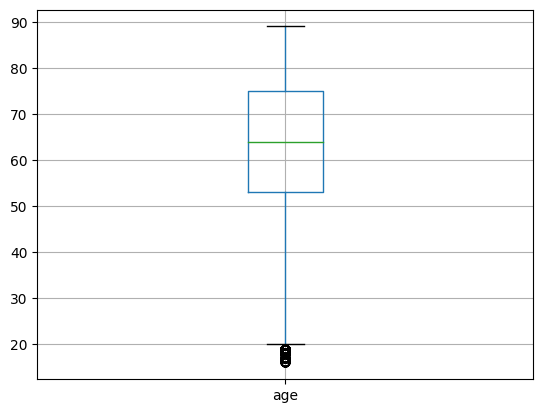

In [119]:
df[['age']].boxplot()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [121]:
# def outlier(feature):
#     q1=df[feature].quantile(0.25)
#     q3=df[feature].quantile(0.75)
#     IQR=q3-q1
#     lower_tail=q1 - 1.5*IQR
# #     print(lower_tail)
#     upper_tail=q3 + 1.5*IQR
# #     print(upper_tail)
    
#     df[feature].loc[df[feature] > upper_tail] = df[feature].median()
#     df[feature].loc[df[feature] < lower_tail] = df[feature].median()
    
#     return "outliers handled"
    
    
    


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [123]:
df['icu_stay_type'].value_counts().to_dict()

{'admit': 86183, 'transfer': 4970, 'readmit': 560}

In [124]:
df['icu_stay_type'].replace({'admit': 0, 'transfer': 1, 'readmit': 2},inplace=True)

In [125]:
df['icu_type'].value_counts().to_dict()

{'Med-Surg ICU': 50586,
 'MICU': 7695,
 'Neuro ICU': 7675,
 'CCU-CTICU': 7156,
 'SICU': 5209,
 'Cardiac ICU': 4776,
 'CSICU': 4613,
 'CTICU': 4003}

In [126]:
df['icu_type'].replace({'Med-Surg ICU': 0,
 'MICU': 1,
 'Neuro ICU': 2,
 'CCU-CTICU': 3,
 'SICU': 4,
 'Cardiac ICU': 5,
 'CSICU': 6,
 'CTICU': 7},inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      91713 non-null  int64  
 7   gender                         91713 non-null  int64  
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  int64  
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  int64  
 12  icu_type                       91713 non-null 

In [128]:
len(df.columns)

84

In [129]:
columns=df.iloc[:,:-1]
len(columns.columns)

83

In [130]:
def outlier(df):
    for col in columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.25,0.75]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=outlier(df)

capping the  encounter_id
capping the  patient_id
capping the  hospital_id
capping the  age
capping the  bmi
capping the  elective_surgery
capping the  ethnicity
capping the  gender
capping the  height
capping the  icu_admit_source
capping the  icu_id
capping the  icu_stay_type
capping the  icu_type
capping the  pre_icu_los_days
capping the  weight
capping the  apache_2_diagnosis
capping the  apache_3j_diagnosis
capping the  apache_post_operative
capping the  arf_apache
capping the  gcs_eyes_apache
capping the  gcs_motor_apache
capping the  gcs_unable_apache
capping the  gcs_verbal_apache
capping the  heart_rate_apache
capping the  intubated_apache
capping the  map_apache
capping the  resprate_apache
capping the  temp_apache
capping the  ventilated_apache
capping the  d1_diasbp_max
capping the  d1_diasbp_min
capping the  d1_diasbp_noninvasive_max
capping the  d1_diasbp_noninvasive_min
capping the  d1_heartrate_max
capping the  d1_heartrate_min
capping the  d1_mbp_max
capping the  d1_mb

C:\Users\soura\AppData\Local\Temp\ipykernel_10824\3428061451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\soura\AppData\Local\Temp\ipykernel_10824\3428061451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  h1_spo2_max
capping the  h1_spo2_min
capping the  h1_sysbp_max
capping the  h1_sysbp_min
capping the  h1_sysbp_noninvasive_max
capping the  h1_sysbp_noninvasive_min
capping the  d1_glucose_max
capping the  d1_glucose_min
capping the  d1_potassium_max
capping the  d1_potassium_min
capping the  apache_4a_hospital_death_prob
capping the  apache_4a_icu_death_prob
capping the  aids
capping the  cirrhosis
capping the  diabetes_mellitus
capping the  hepatic_failure
capping the  immunosuppression
capping the  leukemia
capping the  lymphoma
capping the  solid_tumor_with_metastasis
capping the  apache_3j_bodysystem
capping the  apache_2_bodysystem


In [131]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

# 5)Feature Selection

In [132]:
#SKIP THIS PART FOR NOW

In [139]:
final_df= pd.DataFrame(df,columns=['apache_4a_icu_death_prob','apache_4a_hospital_death_prob', 'apache_3j_diagnosis', 'age', 'bmi','ventilated_apache', 'gender','apache_2_diagnosis',
                  'heart_rate_apache','d1_spo2_min','d1_heartrate_min'])

# 6)MODEL TRAINING

In [140]:
final_df.columns

Index(['apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob',
       'apache_3j_diagnosis', 'age', 'bmi', 'ventilated_apache', 'gender',
       'apache_2_diagnosis', 'heart_rate_apache', 'd1_spo2_min',
       'd1_heartrate_min'],
      dtype='object')

In [141]:
x=final_df
y=df['hospital_death']

In [142]:
# #TRAIN TEST SPLIT
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((73370, 11), (18343, 11), (73370,), (18343,))

In [144]:
log_reg=LogisticRegression(max_iter=900)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=900)

# 7)MODEL EVALUATION

In [146]:
def train_test_data(y_actual,y_pred):
    accuracy=accuracy_score(y_actual,y_pred)
    print(f"accuracy_score=={accuracy}")
    
    cm=confusion_matrix(y_actual,y_pred)
    print(cm)
    
    clf=classification_report(y_actual,y_pred)
    print(clf)
    
    return "metrics calculated"

In [147]:
#TESTING DATASET
y_pred_test=log_reg.predict(x_test)
train_test_data(y_test,y_pred_test)

accuracy_score==0.913645532355667
[[16743    17]
 [ 1567    16]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16760
           1       0.48      0.01      0.02      1583

    accuracy                           0.91     18343
   macro avg       0.70      0.50      0.49     18343
weighted avg       0.88      0.91      0.87     18343



'metrics calculated'

In [148]:
#TRAINING DATASET
y_pred_train=log_reg.predict(x_train)
train_test_data(y_train,y_pred_train)

accuracy_score==0.9136159193130707
[[66970    68]
 [ 6270    62]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     67038
           1       0.48      0.01      0.02      6332

    accuracy                           0.91     73370
   macro avg       0.70      0.50      0.49     73370
weighted avg       0.88      0.91      0.87     73370



'metrics calculated'

# USING KNEIGHBORS CLASSIFICATION

In [149]:
final_df.describe()

,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,apache_3j_diagnosis,age,bmi,ventilated_apache,gender,apache_2_diagnosis,heart_rate_apache,d1_spo2_min,d1_heartrate_min
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.029541,0.062495,441.666843,64.072058,28.029621,0.323182,0.460338,184.336539,103.701067,92.222651,70.034935
std,0.020315,0.040010,208.096408,8.815420,3.557294,0.467694,0.498427,83.745538,13.175176,2.416328,8.542868
min,0.010000,0.020000,203.010000,53.000000,23.787760,0.000000,0.000000,113.000000,87.000000,89.000000,60.000000
25%,0.010000,0.020000,203.010000,53.000000,23.787760,0.000000,0.000000,113.000000,87.000000,89.000000,60.000000
50%,0.020000,0.050000,409.020000,64.000000,27.654655,0.000000,0.000000,122.000000,104.000000,92.000000,69.000000
75%,0.060000,0.120000,703.030000,75.000000,32.653061,1.000000,1.000000,301.000000,120.000000,95.000000,81.000000
max,0.060000,0.120000,703.030000,75.000000,32.653061,1.000000,1.000000,301.000000,120.000000,95.000000,81.000000


In [150]:
norm=MinMaxScaler()
x_train_trf=norm.fit_transform(x_train)
x_test_trf=norm.transform(x_test)

In [151]:
knn_reg=KNeighborsClassifier()
knn_reg.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [152]:
#TESTING DATASET
y_pred_test=log_reg.predict(x_test)
train_test_data(y_test,y_pred_test)

accuracy_score==0.913645532355667
[[16743    17]
 [ 1567    16]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16760
           1       0.48      0.01      0.02      1583

    accuracy                           0.91     18343
   macro avg       0.70      0.50      0.49     18343
weighted avg       0.88      0.91      0.87     18343



'metrics calculated'

In [154]:
#TRAINING DATASET
y_pred_train=log_reg.predict(x_train)
train_test_data(y_train,y_pred_train)

accuracy_score==0.9136159193130707
[[66970    68]
 [ 6270    62]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     67038
           1       0.48      0.01      0.02      6332

    accuracy                           0.91     73370
   macro avg       0.70      0.50      0.49     73370
weighted avg       0.88      0.91      0.87     73370



'metrics calculated'

# USING DECISION TREE

### 6)MODEL TRAINING

In [155]:
dt_reg=DecisionTreeClassifier(random_state=10)
dt_reg.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

### 7)MODEL EVALUATION

In [156]:
#TESTING DATA
y_pred_test_dt=dt_reg.predict(x_test)
train_test_data(y_test,y_pred_test_dt)

accuracy_score==0.8659979283650439
[[15449  1311]
 [ 1147   436]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     16760
           1       0.25      0.28      0.26      1583

    accuracy                           0.87     18343
   macro avg       0.59      0.60      0.59     18343
weighted avg       0.87      0.87      0.87     18343



'metrics calculated'

In [158]:
#TRAINING DATA
y_pred_train_dt=dt_reg.predict(x_train)
train_test_data(y_train,y_pred_train_dt)

accuracy_score==0.9962382445141066
[[66991    47]
 [  229  6103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67038
           1       0.99      0.96      0.98      6332

    accuracy                           1.00     73370
   macro avg       0.99      0.98      0.99     73370
weighted avg       1.00      1.00      1.00     73370



'metrics calculated'

In [159]:
#DECISION TREE HYPERPARAMETER TRAINING
dt_reg_hyp=DecisionTreeClassifier()
hyp={'criterion':['gini','entropy'],
     'max_depth':np.arange(5,10),
     'min_samples_split':np.arange(2,20),
     'min_samples_leaf':np.arange(1,15),
     'random_state':np.arange(2,10),
     }

In [160]:
rscv=RandomizedSearchCV(dt_reg_hyp,hyp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'random_state': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [161]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=11,
                       min_samples_split=7, random_state=9)

In [162]:
dt_hyp_model=rscv.best_estimator_
dt_hyp_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=11,
                       min_samples_split=7, random_state=9)

In [163]:
y_pred_test_dt_hyp=dt_hyp_model.predict(x_test)
train_test_data(y_test,y_pred_test_dt_hyp)

accuracy_score==0.9152265169274383
[[16552   208]
 [ 1347   236]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     16760
           1       0.53      0.15      0.23      1583

    accuracy                           0.92     18343
   macro avg       0.73      0.57      0.59     18343
weighted avg       0.89      0.92      0.89     18343



'metrics calculated'

In [164]:
y_pred_train_dt_hyp=dt_hyp_model.predict(x_train)
train_test_data(y_train,y_pred_train_dt_hyp)

accuracy_score==0.9160419790104948
[[66223   815]
 [ 5345   987]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     67038
           1       0.55      0.16      0.24      6332

    accuracy                           0.92     73370
   macro avg       0.74      0.57      0.60     73370
weighted avg       0.89      0.92      0.89     73370



'metrics calculated'

# USING RANDOM FOREST 

### 6)MODEL TRAINING

In [165]:
rf_reg=RandomForestClassifier(random_state=9)
rf_reg.fit(x_train,y_train)

RandomForestClassifier(random_state=9)

### 7)MODEL EVALUATION

In [166]:
y_pred_test_rf=rf_reg.predict(x_test)
train_test_data(y_test,y_pred_test_rf)

accuracy_score==0.9117374475276673
[[16437   323]
 [ 1296   287]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     16760
           1       0.47      0.18      0.26      1583

    accuracy                           0.91     18343
   macro avg       0.70      0.58      0.61     18343
weighted avg       0.89      0.91      0.89     18343



'metrics calculated'

In [167]:
y_pred_train_rf=rf_reg.predict(x_train)
train_test_data(y_train,y_pred_train_rf)

accuracy_score==0.996156467220935
[[66933   105]
 [  177  6155]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67038
           1       0.98      0.97      0.98      6332

    accuracy                           1.00     73370
   macro avg       0.99      0.99      0.99     73370
weighted avg       1.00      1.00      1.00     73370



'metrics calculated'

In [168]:
rf_hyp_reg=RandomForestClassifier()
hyp={'n_estimators':np.arange(100,1000,50),
     'criterion':['gini','entropy'],
     'max_depth':np.arange(5,10),
     'min_samples_split':np.arange(2,20),
     'min_samples_leaf':np.arange(1,15),
     'random_state':np.arange(2,10)}

In [169]:
rf_hyp_model=RandomizedSearchCV(rf_hyp_reg,hyp,cv=5)
rf_hyp_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'random_state': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [170]:
rf_hyp_model.best_params_

{'random_state': 2,
 'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 10,
 'max_depth': 9,
 'criterion': 'gini'}

In [171]:
rf_hyp=rf_hyp_model.best_estimator_
rf_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=12,
                       n_estimators=200, random_state=2)

### 7)MODEL EVALUATION

In [172]:
y_pred_test_hyp_rf=rf_hyp.predict(x_test)
train_test_data(y_test,y_pred_test_hyp_rf)

accuracy_score==0.9165894346617238
[[16677    83]
 [ 1447   136]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16760
           1       0.62      0.09      0.15      1583

    accuracy                           0.92     18343
   macro avg       0.77      0.54      0.55     18343
weighted avg       0.89      0.92      0.89     18343



'metrics calculated'

In [173]:
y_pred_train_hyp_rf=rf_hyp.predict(x_train)
train_test_data(y_train,y_pred_train_hyp_rf)

accuracy_score==0.9187951478806051
[[66779   259]
 [ 5699   633]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     67038
           1       0.71      0.10      0.18      6332

    accuracy                           0.92     73370
   macro avg       0.82      0.55      0.57     73370
weighted avg       0.90      0.92      0.89     73370



'metrics calculated'

# USING ADABOOST CLASSIFIER

In [174]:
ab_reg=AdaBoostClassifier(random_state=5)
ab_reg.fit(x_train,y_train)

AdaBoostClassifier(random_state=5)

In [175]:
y_pred_test_ab=ab_reg.predict(x_test)
train_test_data(y_test,y_pred_test_ab)

accuracy_score==0.9170255683366952
[[16636   124]
 [ 1398   185]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     16760
           1       0.60      0.12      0.20      1583

    accuracy                           0.92     18343
   macro avg       0.76      0.55      0.58     18343
weighted avg       0.89      0.92      0.89     18343



'metrics calculated'

In [176]:
y_pred_train_ab=ab_reg.predict(x_train)
train_test_data(y_train,y_pred_train_ab)

accuracy_score==0.9165326427695243
[[66506   532]
 [ 5592   740]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     67038
           1       0.58      0.12      0.19      6332

    accuracy                           0.92     73370
   macro avg       0.75      0.55      0.58     73370
weighted avg       0.89      0.92      0.89     73370



'metrics calculated'

In [177]:
ab_reg=AdaBoostClassifier()
hyp={'n_estimators':np.arange(50,500,10),
    'learning_rate':np.arange(0.1,1.0,0.1)}

In [178]:
rscv=RandomizedSearchCV(ab_reg,hyp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490])})

In [180]:
rscv.best_params_

{'n_estimators': 480, 'learning_rate': 0.9}

In [181]:
ab_reg_hyp=rscv.best_estimator_
ab_reg_hyp.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=480)

In [182]:
y_pred_test_ab_hyp=ab_reg_hyp.predict(x_test)
train_test_data(y_test,y_pred_test_ab_hyp)

accuracy_score==0.9169165349179523
[[16597   163]
 [ 1361   222]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     16760
           1       0.58      0.14      0.23      1583

    accuracy                           0.92     18343
   macro avg       0.75      0.57      0.59     18343
weighted avg       0.89      0.92      0.89     18343



'metrics calculated'

In [183]:
y_pred_train_ab_hyp=ab_reg_hyp.predict(x_train)
train_test_data(y_train,y_pred_train_ab_hyp)

accuracy_score==0.9177593021670982
[[66410   628]
 [ 5406   926]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     67038
           1       0.60      0.15      0.23      6332

    accuracy                           0.92     73370
   macro avg       0.76      0.57      0.60     73370
weighted avg       0.90      0.92      0.89     73370



'metrics calculated'

# CREATING PICKLE FILE

In [184]:
with open('ab_reg_hyp1.pkl','wb') as file:
    pickle.dump(ab_reg_hyp,file)

In [191]:
imp= rf_reg.feature_importances_
len(imp)

11

In [190]:
column= final_df.columns
len(column)

11

In [ ]:
# plt.barh(boston.feature_names, rf.feature_importances_)

In [ ]:
# sorted_idx = rf.feature_importances_.argsort()
# plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

<BarContainer object of 11 artists>

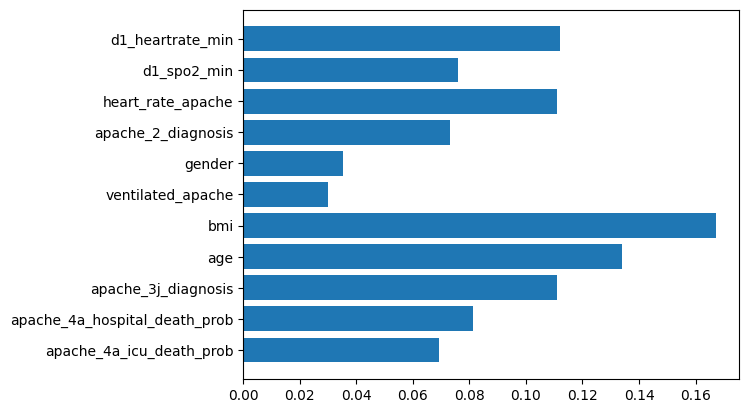

In [192]:
plt.barh(column,imp)

In [138]:
final_df= pd.DataFrame(df,columns=['apache_4a_icu_death_prob','apache_4a_hospital_death_prob', 'apache_3j_diagnosis', 'age', 'bmi','ventilated_apache', 'gender','apache_2_diagnosis',
                  'heart_rate_apache','d1_spo2_min','d1_heartrate_min'])
# final_df=final_df[['apache_4a_icu_death_prob','apache_4a_hospital_death_prob', 'apache_3j_diagnosis', 'age', 'bmi','ventilated_apache', 'gender','apache_2_diagnosis',
#                   'heart_rate_apache','d1_spo2_min','d1_heartrate_min']]
final_df

,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,apache_3j_diagnosis,age,bmi,ventilated_apache,gender,apache_2_diagnosis,heart_rate_apache,d1_spo2_min,d1_heartrate_min
0,0.05,0.10,502.01,68.000000,23.787760,0.0,0,113.0,118.0,89.0,72.0
1,0.06,0.12,203.01,75.000000,27.420000,1.0,1,113.0,120.0,89.0,72.0
2,0.01,0.02,703.03,53.000000,31.950000,0.0,1,122.0,102.0,91.0,68.0
3,0.03,0.04,703.03,75.000000,23.787760,1.0,1,203.0,114.0,95.0,81.0
4,0.02,0.05,601.01,53.000000,27.654655,0.0,0,119.0,87.0,95.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
91708,0.05,0.12,501.06,75.000000,23.787760,1.0,0,113.0,115.0,89.0,70.0
91709,0.02,0.03,501.05,56.000000,32.653061,0.0,1,113.0,100.0,89.0,76.0
91710,0.02,0.05,702.01,53.000000,27.236914,0.0,0,123.0,120.0,89.0,79.0
91711,0.02,0.07,203.01,62.309516,23.787760,0.0,1,113.0,87.0,89.0,60.0


Text(0.5, 0, 'Random Forest Feature Importance')

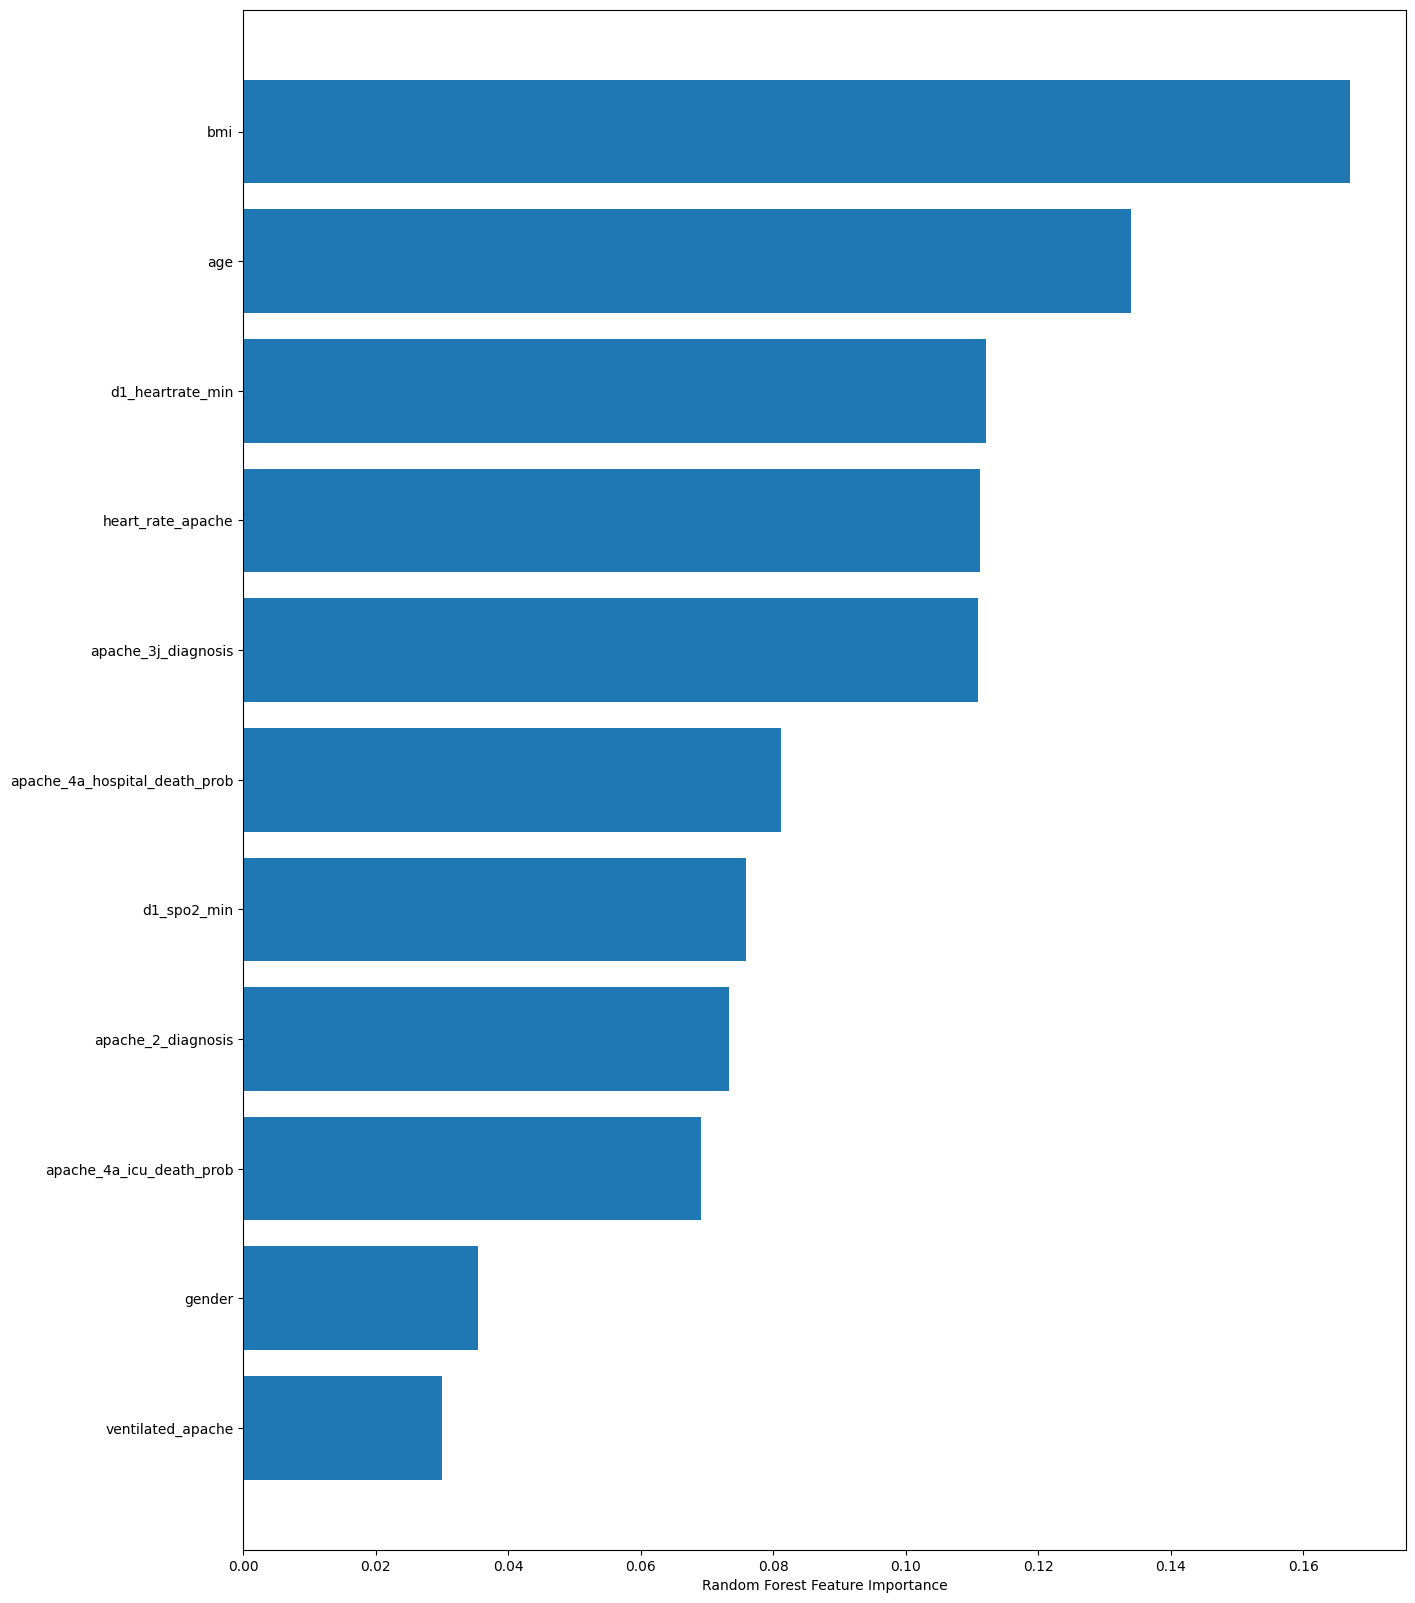

In [193]:
plt.figure(figsize=(15,20))
sorted_idx= imp.argsort()
plt.barh(column[sorted_idx],imp[sorted_idx])
plt.xlabel("Random Forest Feature Importance")